In [2]:
# Look at max rigidity, max 1.5 Tesla, look at bending spec

In [3]:
from pdf2image import convert_from_path

In [4]:
from cpymad.madx import Madx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from pybt.tools.plotters import *
from matplotlib.patches import Ellipse, Rectangle
import requests

In [5]:
# Beam characteristics
gamma = 25.598474067
beta = np.sqrt(1-gamma**(-2))
exn = 4.92e-06
eyn = 3.4e-06
sige = 0.000412
ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)
Brho = 24*3.3356

# Initial conditions
betx0 = 154.0835045206266
bety0 = 5.222566527078791
alfx0 = -36.90472944993891
alfy0 = 0.2523074897915478
Dx0 = 0.13
Dy0 = 0.0
Dpx0 = 0.02
Dpy0 = 0.0
exn = 7.639770207283603e-06
eyn =  3.534081877201574e-06
sige = 0.000679081344780741

In [6]:
 #################################### Initialize MADX ####################################
with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.input(requests.get("https://gitlab.cern.ch/acc-models/acc-models-tls/-/raw/2021/ps_extraction/f61d/f61d.dbx").text)
madx.input(requests.get("https://gitlab.cern.ch/acc-models/acc-models-tls/-/raw/2021/ps_extraction/f61d/f61d.ele").text)
madx.input(requests.get("https://gitlab.cern.ch/acc-models/acc-models-tls/-/raw/2021/ps_extraction/f61d/f61d.seq").text)
madx.input(requests.get("https://gitlab.cern.ch/acc-models/acc-models-tls/-/raw/2021/ps_extraction/f61d/f61d_proton.str").text)

ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)

madx.command.beam(particle='PROTON',pc="24",exn=exn,eyn=eyn)
madx.input('BRHO      := BEAM->PC * 3.3356;')

madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
# madx.input('SELECT, FLAG=aperture, COLUMN=apertype;')

madx.input("kQFN1 = "+str(0.4797)+";")
madx.input("kQDN2 = "+str(-0.173)+";")
madx.input("kQFN3 = "+str(0.1986)+";")

madx.use(sequence="f61d")
twiss_f61d = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()
survey_f61d = madx.survey()
fig, ax = plt.subplots()
ax.plot(survey_f61d.z, survey_f61d.x, marker="o")
ax.set_aspect("equal")

In [7]:
 #################################### Initialize MADX ####################################
with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.seq?ref_type=heads").text)
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.str?ref_type=heads").text)

ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)

madx.command.beam(particle='PROTON',pc="24",exn=exn,eyn=eyn)
madx.input('BRHO      := BEAM->PC * 3.3356;')

madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
# madx.input('SELECT, FLAG=aperture, COLUMN=apertype;')

madx.input("kQFN1 = "+str(0.4797)+";")
madx.input("kQDN2 = "+str(-0.173)+";")
madx.input("kQFN3 = "+str(0.1986)+";")

madx.use(sequence="f61t8_op")
twiss_f61d = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

survey_f61t8 = madx.survey()
fig, ax = plt.subplots()
ax.plot(survey_f61t8.z, survey_f61t8.x, marker="o")
ax.set_aspect("equal")

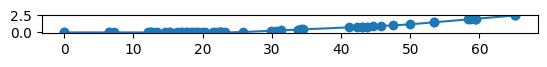

In [8]:
 #################################### Initialize MADX ####################################
with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61f62/f61f62newea14.ele?ref_type=heads").text)
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61f62/f61f62newea14.seq?ref_type=heads").text)

ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)

madx.command.beam(particle='PROTON',pc="24",exn=exn,eyn=eyn)
madx.input('BRHO      := BEAM->PC * 3.3356;')

madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
# madx.input('SELECT, FLAG=aperture, COLUMN=apertype;')

madx.input("kQFN1 = "+str(0.4797)+";")
madx.input("kQDN2 = "+str(-0.173)+";")
madx.input("kQFN3 = "+str(0.1986)+";")

madx.use(sequence="f61f62newea14")
twiss_f61d = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

survey_f61f62 = madx.survey()
fig, ax = plt.subplots()
ax.plot(survey_f61f62.z, survey_f61f62.x, marker="o")
ax.set_aspect("equal")

In [9]:
 #################################### Initialize MADX ####################################
with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61f62f63/f61f62f63newea14.ele?ref_type=heads").text)
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61f62f63/f61f62f63newea14.seq?ref_type=heads").text)

ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)

madx.command.beam(particle='PROTON',pc="24",exn=exn,eyn=eyn)
madx.input('BRHO      := BEAM->PC * 3.3356;')

madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
# madx.input('SELECT, FLAG=aperture, COLUMN=apertype;')

madx.input("kQFN1 = "+str(0.4797)+";")
madx.input("kQDN2 = "+str(-0.173)+";")
madx.input("kQFN3 = "+str(0.1986)+";")

madx.use(sequence="f61f62f63newea14")
twiss_f61d = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

survey_f61f62f63 = madx.survey()
fig, ax = plt.subplots()
ax.plot(survey_f61f62f63.z, survey_f61f62f63.x, marker="o")
ax.set_aspect("equal")

# T12 Line

In [10]:
 #################################### Initialize MADX ####################################
with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.call("f61t12.seq")
madx.call("f61t12.str")

ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)

madx.command.beam(particle='PROTON',pc="24",exn=exn,eyn=eyn)
madx.input('BRHO      := BEAM->PC * 3.3356;')

madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
# madx.input('SELECT, FLAG=aperture, COLUMN=apertype;')

madx.input("kQFN1 = "+str(0.4797)+";")
madx.input("kQDN2 = "+str(-0.173)+";")
madx.input("kQFN3 = "+str(0.1986)+";")

madx.use(sequence="f61t12")
twiss_f61t12 = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

survey_f61t12 = madx.survey()
fig, ax = plt.subplots()
ax.plot(survey_f61t12.z, survey_f61t12.x, marker="o")
ax.set_aspect("equal")

# F61T12 Early

In [11]:
 #################################### Initialize MADX ####################################
with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.call("f61t12_early.seq")
madx.call("f61t12_early.str")

ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)

madx.command.beam(particle='PROTON',pc="24",exn=exn,eyn=eyn)
madx.input('BRHO      := BEAM->PC * 3.3356;')

madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
# madx.input('SELECT, FLAG=aperture, COLUMN=apertype;')

madx.input("kQFN1 = "+str(0.4797)+";")
madx.input("kQDN2 = "+str(-0.173)+";")
madx.input("kQFN3 = "+str(0.1986)+";")

madx.use(sequence="f61t12")
twiss_f61t12_early = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

survey_f61t12_early = madx.survey()
fig, ax = plt.subplots()
ax.plot(survey_f61t12_early.z, survey_f61t12_early.x, marker="o")
ax.set_aspect("equal")

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(survey_f61d.z, survey_f61d.x, label="f61d", lw=4)
ax.plot(survey_f61t8.z, survey_f61t8.x, label="f61t8", lw=4)
ax.plot(survey_f61f62.z, survey_f61f62.x, label="f61f62", lw=4)
ax.plot(survey_f61f62f63.z, survey_f61f62f63.x, label="f61f62f63", lw=4)
ax.plot(survey_f61t12.z, survey_f61t12.x, label="f61t12", lw=4)
ax.plot(survey_f61t12_early.z, survey_f61t12_early.x, label="f61t12_early", lw=4)
ax.set_aspect("equal")
ax.legend(loc="upper right")

plt.savefig("filename.png", transparent=True, dpi = 300, bbox_inches='tight')

In [13]:
twiss_f61t12.angle

#s              0.000
f61.start       0.000
drift_0[0]      0.000
q74             0.000
f61.mqncl007    0.000
                ...  
f63.mbxhd00d   -0.076
drift_27[0]     0.000
f63.mbxhd00e   -0.076
drift_28[0]     0.000
#e              0.000
Name: angle, Length: 61, dtype: float64

In [14]:
from madxtools.math import *

theta = abs(twiss_f61t12.angle["f63.mbxhd00a"])
rigidity = pb_ion_rigidity(3.0)
l = 2.5
B = theta*rigidity/l

In [15]:
print(f"The field is {round(B,3)} [T]")

The field is 1.492 [T]


In [16]:
print(f"Max angle is {round(1.5*2.5/pb_ion_rigidity(3.0),3)}")

Max angle is 0.076


In [17]:
import ezdxf

# Load your DXF file (converted from DWG)
doc = ezdxf.readfile("157-r.dxf")

# Accessing modelspace
msp = doc.modelspace()

# Example: Iterating through entities
for entity in msp:
    print(entity)
    if entity.dxftype() == 'LINE':
        # Do something with the line
        print(entity.dxf.start, entity.dxf.end)

# Modify or analyze your DXF file as needed


TEXT(#1534)
TEXT(#1535)
TEXT(#1536)
TEXT(#1537)
TEXT(#1538)
TEXT(#1539)
TEXT(#153A)
TEXT(#153B)
INSERT(#153F)
INSERT(#1A3B)
INSERT(#1DB7)
INSERT(#1DCF)
INSERT(#230A)
INSERT(#289C)
INSERT(#306D)
INSERT(#3400)
INSERT(#35B8)
INSERT(#3887)
INSERT(#3911)
INSERT(#3AD7)
POLYLINE(#3B40)
TEXT(#3B74)
TEXT(#3B75)
POLYLINE(#3B76)
TEXT(#3B87)
TEXT(#3B88)
POLYLINE(#3B89)
TEXT(#3B8F)
TEXT(#3B90)
POLYLINE(#3B91)
TEXT(#3BAB)
TEXT(#3BAC)
INSERT(#3BB0)
TEXT(#3BE5)
TEXT(#3BE6)
POLYLINE(#3BE7)
TEXT(#3BED)
TEXT(#3BEE)
POLYLINE(#3BEF)
TEXT(#3BFE)
TEXT(#3BFF)
POLYLINE(#3C00)
TEXT(#3C12)
TEXT(#3C13)
INSERT(#3C17)
TEXT(#3D46)
TEXT(#3D47)
POLYLINE(#3D48)
TEXT(#3D56)
TEXT(#3D57)
POLYLINE(#3D58)
TEXT(#3D85)
TEXT(#3D86)
POLYLINE(#3D87)
TEXT(#3D8F)
TEXT(#3D90)
POLYLINE(#3D91)
TEXT(#3DE3)
TEXT(#3DE4)
POLYLINE(#3DE5)
TEXT(#3DEB)
TEXT(#3DEC)
POLYLINE(#3DED)
TEXT(#3DF5)
TEXT(#3DF6)
POLYLINE(#3DF7)
TEXT(#3DFD)
TEXT(#3DFE)
POLYLINE(#3DFF)
TEXT(#3E09)
TEXT(#3E0A)
POLYLINE(#3E0B)
TEXT(#3E19)
TEXT(#3E1A)
POLYLINE(#3E1B)
TEXT

In [18]:
import ezdxf
import matplotlib.pyplot as plt

# Load your DXF file
doc = ezdxf.readfile("157-r.dxf")

# Accessing modelspace
msp = doc.modelspace()

# Creating a plot
fig, ax = plt.subplots(figsize=(40,40))

# Iterating through entities and plotting lines and polylines
for entity in msp:
    if entity.dxftype() == 'LINE':
        start_point = entity.dxf.start
        end_point = entity.dxf.end
        ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 'b')  # 'b' for blue line
    elif entity.dxftype() == 'LWPOLYLINE':
        points = entity.get_points(format='xyb')
        x_points, y_points = zip(*[(x, y) for x, y, b in points])
        ax.plot(x_points, y_points, 'r')  # 'r' for red LWPOLYLINE
    elif entity.dxftype() == 'POLYLINE':
        vertices = entity.vertices
        x_points, y_points = zip(*[(vertex.dxf.location.x, vertex.dxf.location.y) for vertex in vertices])
        ax.plot(x_points, y_points, 'g')  # 'g' for green POLYLINE

# Setting labels and title
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.set_title('DXF File Plot')

# Show the plot
ax.set_aspect("equal")

In [19]:
import ezdxf

doc = ezdxf.readfile("157_R.dxf")

In [20]:
msp = doc.modelspace()

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25, 10))

# Assuming 'msp' is your model space from the DXF file
for e in msp:
    if e.dxftype() == 'LWPOLYLINE':
        points = e.get_points(format='xyb')  # 'xyb' format for 2D polyline
        x, y, _ = zip(*points)
        ax.plot(x, y)

    elif e.dxftype() == 'POLYLINE':
        x, y = zip(*[(v.dxf.location.x, v.dxf.location.y) for v in e.vertices])
        ax.plot(x, y)

    # elif e.dxftype() == 'INSERT':
    #     insertion_point = e.dxf.insert
    #     ax.plot(insertion_point.x, insertion_point.y, 'ro')  # Example: red dot

    elif e.dxftype() == 'TEXT':
        text_point = e.dxf.insert
        ax.text(text_point.x, text_point.y, e.dxf.text)

# Set aspect ratio and show plot
ax.set_aspect('equal', adjustable='box')

In [22]:
for layer in doc.layers:
    print(layer.dxf.name)

0
Plano_Divers
Plano_Blindage
Plano_Cloison
Plano_Escalier
Plano_Vitrage
Plano_Mobilier
Plano_Structure
Plano_Porte
Plano_Titre
Plano_Numero local
Plano_Texte divers
Plano_Barriere
Plano_Surface
Plano_Cache
Plano_Tirete
Plano_Surface_txt
Plano_Vide
Plano_Installation_technique
Plano_Mur_porteur
Plano_Racks
Defpoints


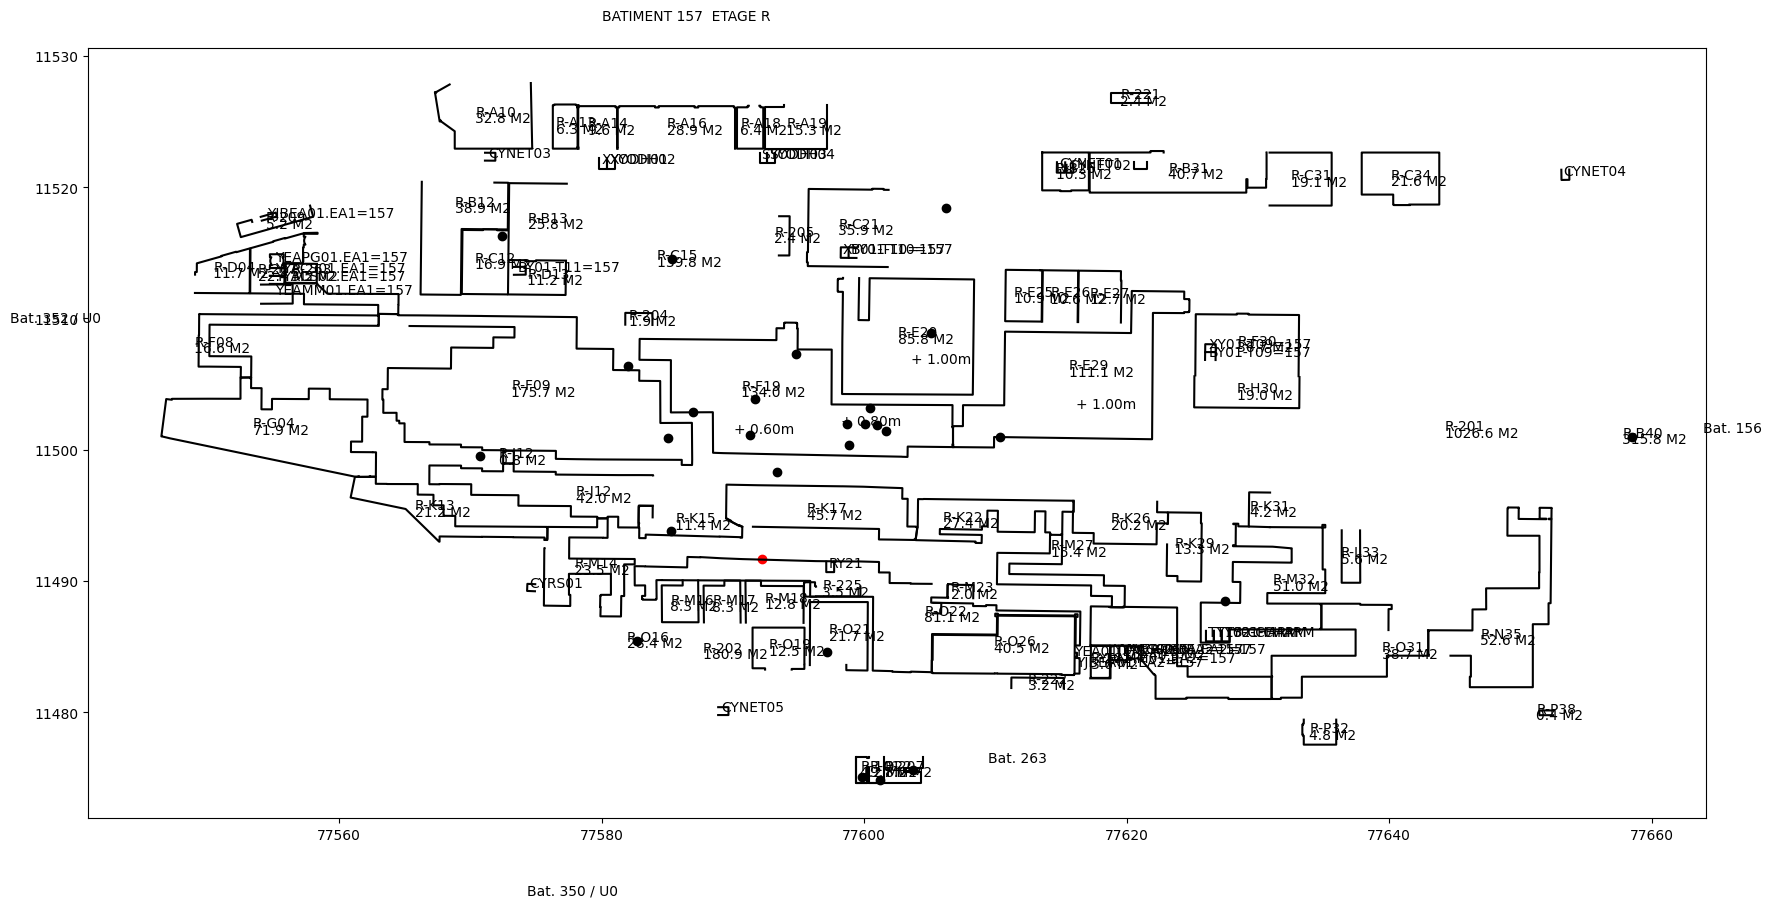

In [23]:
fig, ax = plt.subplots(figsize=(25, 10))

# Assuming 'msp' is your model space from the DXF file
layer_colors = {  # Define colors for each layer
    "Plano_Mur_porteur": "red",
    # "Plano_Structure": "green",
    # Add more layers and their colors as needed
}

for e in msp:
    layer_name = e.dxf.layer
    color = layer_colors.get(layer_name, "black")  # Default color is black

    if e.dxftype() == 'LWPOLYLINE':
        points = e.get_points(format='xyb')
        x, y, _ = zip(*points)
        ax.plot(x, y, color=color)

    elif e.dxftype() == 'POLYLINE':
        x, y = zip(*[(v.dxf.location.x, v.dxf.location.y) for v in e.vertices])
        ax.plot(x, y, color=color)

    elif e.dxftype() == 'INSERT':
        insertion_point = e.dxf.insert
        ax.plot(insertion_point.x, insertion_point.y, 'o', color=color)

    elif e.dxftype() == 'TEXT':
        text_point = e.dxf.insert
        ax.text(text_point.x, text_point.y, e.dxf.text)

# Set aspect ratio and show plot
ax.set_aspect('equal', adjustable='box')

In [26]:
# # Extract and print all information from the layer "Plano_Mur_porteur"
# layer_name = "Plano_Mur_porteur"
# entities_in_layer = [e for e in msp if e.dxf.layer == layer_name]

# # Print details of each entity in the specified layer
# layer_details = []
# for entity in entities_in_layer:
#     entity_details = {
#         "Type": entity.dxftype(),
#         "Attributes": {attr: getattr(entity.dxf, attr, None) for attr in entity.DXFATTRIBS}
#     }
#     layer_details.append(entity_details)

# layer_details

TypeError: 'DXFAttributes' object is not iterable

In [27]:
msp = doc.modelspace()

In [28]:
psp = doc.paperspace("Layout1")

In [29]:
blk = doc.blocks.get("NAME")

In [30]:
import sys
import matplotlib.pyplot as plt
from ezdxf import recover
from ezdxf.addons.drawing import RenderContext, Frontend
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend


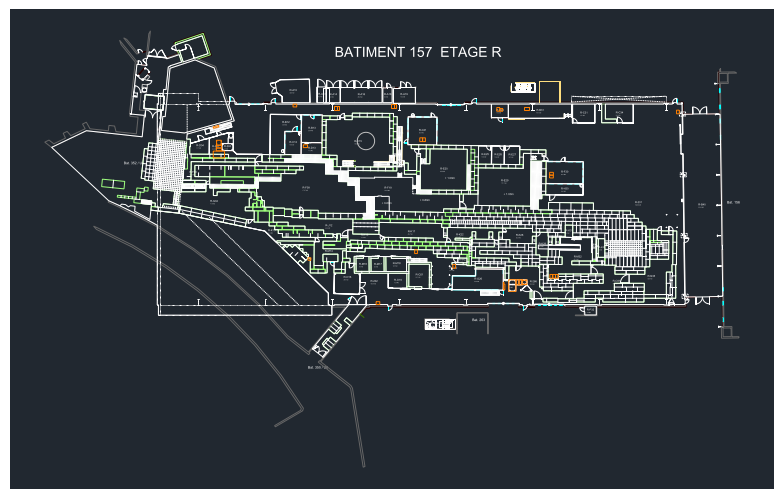

In [31]:
# Safe loading procedure (requires ezdxf v0.14):
try:
    doc, auditor = recover.readfile('157_R.dxf')
except IOError:
    print(f'Not a DXF file or a generic I/O error.')
    sys.exit(1)
except ezdxf.DXFStructureError:
    print(f'Invalid or corrupted DXF file.')
    sys.exit(2)

# The auditor.errors attribute stores severe errors,
# which may raise exceptions when rendering.
if not auditor.has_errors:
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(doc)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(doc.modelspace(), finalize=True)
    fig.savefig('East_Area_bld.png', dpi=500)

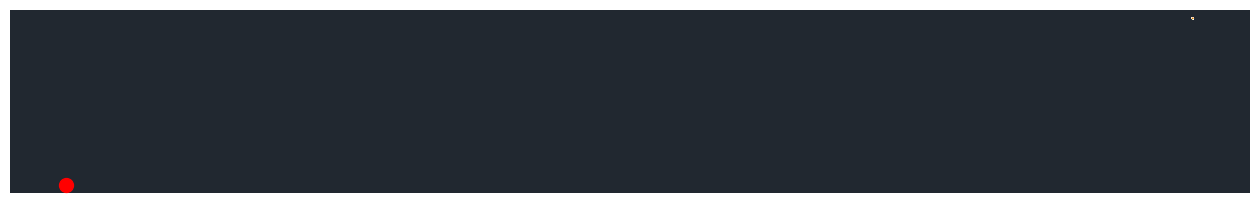

In [32]:
fig, ax = plt.subplots(figsize=(25,5))
ax.scatter(0,0, s=100, c="r")
ctx = RenderContext(doc)
out = MatplotlibBackend(ax)
Frontend(ctx, out).draw_layout(doc.modelspace(), finalize=True)

In [33]:
dev_f61 = pd.read_csv('geode_data/beam_dev_18_11_2021_F61.csv', skiprows=1)
dev_pr = pd.read_csv('geode_data/beam_dev_18_11_2021_PR.csv', skiprows=1)
dev_t08 = pd.read_csv('geode_data/beam_dev_18_11_2021_T08.csv', skiprows=1)
dev_t09 = pd.read_csv('geode_data/beam_dev_18_11_2021_T09.csv', skiprows=1)
dev_t10 = pd.read_csv('geode_data/beam_dev_18_11_2021_T10.csv', skiprows=1)
dev_t11 = pd.read_csv('geode_data/beam_dev_18_11_2021_T11.csv', skiprows=1)
dev_f62 = pd.read_csv('geode_data/beam_dev_18_11_2021_F62.csv', skiprows=1)
dev_f63 = pd.read_csv('geode_data/beam_dev_18_11_2021_F63.csv', skiprows=1)

In [34]:
import pandas as pd
import numpy as np

def calc_absolute_deviation(my_dataframe):
    output_dataframe = pd.DataFrame(columns=["name","x", "y", "x_dev_absolute","y_dev_absolute"])
    
    for i in range(len(my_dataframe)):
        if (my_dataframe.X_S[i]-my_dataframe.X_E[i])>=0:
            sign = +1
        else:
            sign = -1

        if type(my_dataframe.NAME[i])==str:
            angle = (my_dataframe.Y_S[i]-my_dataframe.Y_E[i])/(my_dataframe.X_S[i]-my_dataframe.X_E[i])

            x_e_dev = my_dataframe.X_E[i]+sign*my_dataframe.DEV_LONG_VALUE_E[i]*np.cos(angle)-sign*my_dataframe.DEV_RAD_VALUE_E[i]*np.sin(angle)
            y_e_dev = my_dataframe.Y_E[i]+sign*my_dataframe.DEV_LONG_VALUE_E[i]*np.sin(angle)+sign*my_dataframe.DEV_RAD_VALUE_E[i]*np.cos(angle)

            x_s_dev = my_dataframe.X_S[i]+sign*my_dataframe.DEV_LONG_VALUE_S[i]*np.cos(angle)-sign*my_dataframe.DEV_RAD_VALUE_S[i]*np.sin(angle)
            y_s_dev = my_dataframe.Y_S[i]+sign*my_dataframe.DEV_LONG_VALUE_S[i]*np.sin(angle)+sign*my_dataframe.DEV_RAD_VALUE_S[i]*np.cos(angle)

            new_rows = pd.DataFrame([
                {"name": str(my_dataframe.NAME[i])+".E" , "x": my_dataframe.X_E[i], "y": my_dataframe.Y_E[i], "x_dev_absolute": x_e_dev, "y_dev_absolute": y_e_dev},
                {"name": str(my_dataframe.NAME[i])+".S" , "x": my_dataframe.X_S[i], "y": my_dataframe.Y_S[i], "x_dev_absolute": x_s_dev, "y_dev_absolute": y_s_dev}
            ])
            
            output_dataframe = pd.concat([output_dataframe, new_rows], ignore_index=True)
    
    return output_dataframe


In [35]:
df_f61 = calc_absolute_deviation(dev_f61)
df_pr = calc_absolute_deviation(dev_pr)
df_t08 = calc_absolute_deviation(dev_t08)
df_t09 = calc_absolute_deviation(dev_t09)
df_t10 = calc_absolute_deviation(dev_t10)
df_t11 = calc_absolute_deviation(dev_t11)
df_f62 = calc_absolute_deviation(dev_f62)
df_f63 = calc_absolute_deviation(dev_f63)

/var/folders/8q/l42hhsl13fxd0py0_2dw6k900000gn/T/ipykernel_6493/2469973304.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  output_dataframe = pd.concat([output_dataframe, new_rows], ignore_index=True)
/var/folders/8q/l42hhsl13fxd0py0_2dw6k900000gn/T/ipykernel_6493/2469973304.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  output_dataframe = pd.concat([output_dataframe, new_rows], ignore_index=True)
/var/folders/8q/l42hhsl13fxd0py0_2dw6k900000gn/T/ipykernel_6493/2469973304.py:14: Runtim

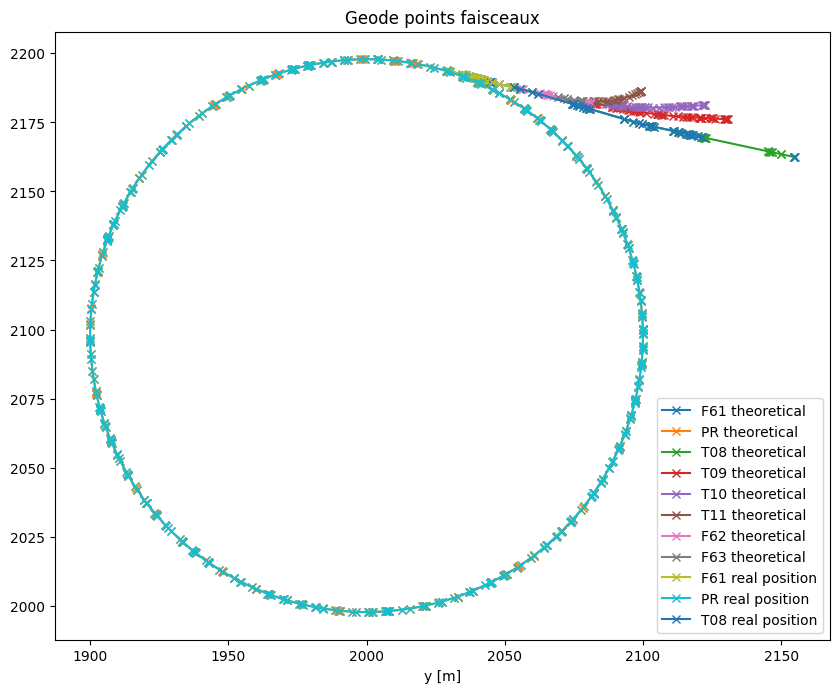

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Geode points faisceaux")

ax.plot(df_f61.x, df_f61.y, marker="x", label = "F61 theoretical")
ax.plot(df_pr.x, df_pr.y, marker="x", label = "PR theoretical")
ax.plot(df_t08.x, df_t08.y, marker="x", label = "T08 theoretical")
ax.plot(df_t09.x, df_t09.y, marker="x", label = "T09 theoretical")
ax.plot(df_t10.x, df_t10.y, marker="x", label = "T10 theoretical")
ax.plot(df_t11.x, df_t11.y, marker="x", label = "T11 theoretical")
ax.plot(df_f62.x, df_f62.y, marker="x", label = "F62 theoretical")
ax.plot(df_f63.x, df_f63.y, marker="x", label = "F63 theoretical")

ax.plot(df_f61.x_dev_absolute, df_f61.y_dev_absolute, marker="x", label = "F61 real position")
ax.plot(df_pr.x_dev_absolute, df_pr.y_dev_absolute, marker="x", label = "PR real position")
ax.plot(df_t08.x_dev_absolute, df_t08.y_dev_absolute, marker="x", label = "T08 real position")

ax.set_aspect('equal')
plt.xlabel("x [m]")
plt.xlabel("y [m]")
plt.legend()

In [37]:
from matplotlib.ticker import AutoLocator

fig, ax = plt.subplots(figsize=(50,50))
ctx = RenderContext(doc)
out = MatplotlibBackend(ax)
Frontend(ctx, out).draw_layout(doc.modelspace(), finalize=True)
x_limits = ax.get_xlim()
y_limits = ax.get_ylim()

x_locator = AutoLocator()
y_locator = AutoLocator()

# Apply the tick intervals
ax.xaxis.set_major_locator(x_locator)
ax.yaxis.set_major_locator(y_locator)

# Show grid for better visibility
ax.grid(True)

print("X-axis limits:", x_limits)
print("Y-axis limits:", y_limits)

X-axis limits: (77510.57042652194, 77674.07475397692)
Y-axis limits: (11440.309713745117, 11542.968301391602)


In [38]:
fig, ax = plt.subplots(figsize=(50,50))
ctx = RenderContext(doc)
out = MatplotlibBackend(ax)
Frontend(ctx, out).draw_layout(doc.modelspace(), finalize=True)
ax.scatter(77550, 11500, s=100, c="r")
x_limits = ax.get_xlim()
y_limits = ax.get_ylim()

print("X-axis limits:", x_limits)
print("Y-axis limits:", y_limits)

X-axis limits: (77510.57042652194, 77674.07475397692)
Y-axis limits: (11440.309713745117, 11542.968301391602)


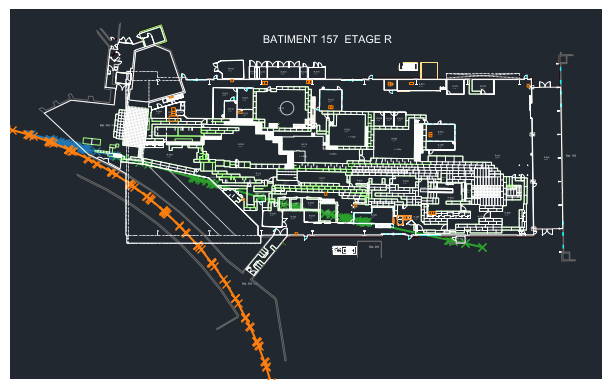

In [39]:
fig, ax = plt.subplots(figsize=(50,50))
doc, auditor = recover.readfile('157_R.dxf')
ctx = RenderContext(doc)
out = MatplotlibBackend(ax)
Frontend(ctx, out).draw_layout(doc.modelspace(), finalize=True)

x_change_ref = 75486
y_change_ref = 9314

ax.plot(x_change_ref + df_f61.x, y_change_ref + df_f61.y, marker="x", label = "F61 theoretical", zorder=99)
ax.plot(x_change_ref + df_pr.x, y_change_ref + df_pr.y, marker="x", label = "PR theoretical", zorder=99)
ax.plot(x_change_ref + df_t08.x, y_change_ref + df_t08.y, marker="x", label = "T08 theoretical", zorder=99)
# ax.plot(x_change_ref + df_t09.x, y_change_ref + df_t09.y, marker="x", label = "T09 theoretical", zorder=99)
# ax.plot(x_change_ref + df_t10.x, y_change_ref + df_t10.y, marker="x", label = "T10 theoretical", zorder=99)
# ax.plot(x_change_ref + df_t11.x, y_change_ref + df_t11.y, marker="x", label = "T11 theoretical", zorder=99)
# ax.plot(x_change_ref + df_f62.x, y_change_ref + df_f62.y, marker="x", label = "F62 theoretical", zorder=99)
# ax.plot(x_change_ref + df_f63.x, y_change_ref + df_f63.y, marker="x", label = "F63 theoretical", zorder=99)

ax.set_aspect("equal")
ax.set_xlim(77510, 77674)
ax.set_ylim(11440, 11542)

fig.savefig('East_Area_combined.png', dpi=500)

X-axis limits: (2492821.8471051664, 2493004.33594744)
Y-axis limits: (1120949.0749064162, 1121137.830484437)


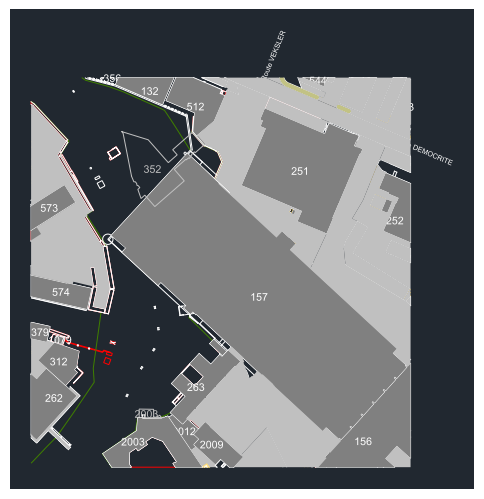

In [40]:
# Safe loading procedure (requires ezdxf v0.14):
try:
    doc, auditor = recover.readfile('ps_extr.dxf')
except IOError:
    print(f'Not a DXF file or a generic I/O error.')
    sys.exit(1)
except ezdxf.DXFStructureError:
    print(f'Invalid or corrupted DXF file.')
    sys.exit(2)

# The auditor.errors attribute stores severe errors,
# which may raise exceptions when rendering.
if not auditor.has_errors:
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(doc)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(doc.modelspace(), finalize=True)
    fig.savefig('East_Area_bld.png', dpi=500)

x_limits = ax.get_xlim()
y_limits = ax.get_ylim()

print("X-axis limits:", x_limits)
print("Y-axis limits:", y_limits)

# Rotation

/var/folders/8q/l42hhsl13fxd0py0_2dw6k900000gn/T/ipykernel_6493/2469973304.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  output_dataframe = pd.concat([output_dataframe, new_rows], ignore_index=True)
/var/folders/8q/l42hhsl13fxd0py0_2dw6k900000gn/T/ipykernel_6493/2469973304.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  output_dataframe = pd.concat([output_dataframe, new_rows], ignore_index=True)
/var/folders/8q/l42hhsl13fxd0py0_2dw6k900000gn/T/ipykernel_6493/2469973304.py:14: Runtim

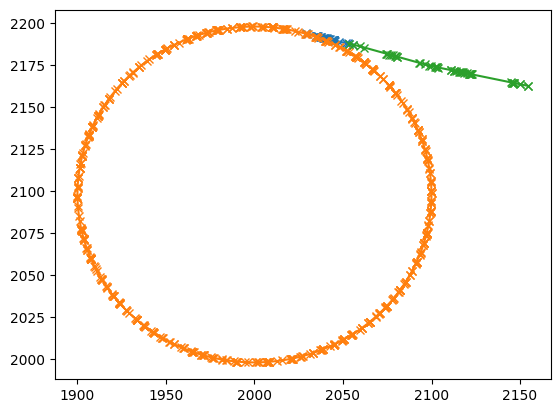

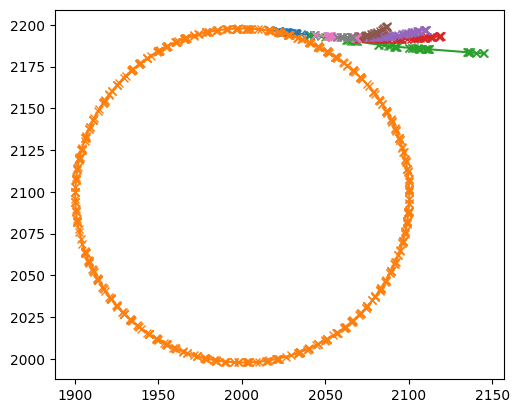

In [41]:
dev_f61 = pd.read_csv('geode_data/beam_dev_18_11_2021_F61.csv', skiprows=1)
dev_pr = pd.read_csv('geode_data/beam_dev_18_11_2021_PR.csv', skiprows=1)
dev_t08 = pd.read_csv('geode_data/beam_dev_18_11_2021_T08.csv', skiprows=1)
dev_t09 = pd.read_csv('geode_data/beam_dev_18_11_2021_T09.csv', skiprows=1)
dev_t10 = pd.read_csv('geode_data/beam_dev_18_11_2021_T10.csv', skiprows=1)
dev_t11 = pd.read_csv('geode_data/beam_dev_18_11_2021_T11.csv', skiprows=1)
dev_f62 = pd.read_csv('geode_data/beam_dev_18_11_2021_F62.csv', skiprows=1)
dev_f63 = pd.read_csv('geode_data/beam_dev_18_11_2021_F63.csv', skiprows=1)

df_f61 = calc_absolute_deviation(dev_f61)
df_pr = calc_absolute_deviation(dev_pr)
df_t08 = calc_absolute_deviation(dev_t08)
df_t09 = calc_absolute_deviation(dev_t09)
df_t10 = calc_absolute_deviation(dev_t10)
df_t11 = calc_absolute_deviation(dev_t11)
df_f62 = calc_absolute_deviation(dev_f62)
df_f63 = calc_absolute_deviation(dev_f63)

fig, ax = plt.subplots()

ax.plot(df_f61.x, df_f61.y, marker="x", label = "F61 theoretical")
ax.plot(df_pr.x, df_pr.y, marker="x", label = "PR theoretical")
ax.plot(df_t08.x, df_t08.y, marker="x", label = "T08 theoretical")

fig, ax = plt.subplots()

# Function to rotate a point around another point
def rotate_around_point(x, y, cx, cy, angle_degrees):
    # Translate point to origin
    x -= cx
    y -= cy

    # Convert angle to radians
    angle_radians = np.radians(angle_degrees)

    # Perform rotation
    x_rotated = x * np.cos(angle_radians) - y * np.sin(angle_radians)
    y_rotated = x * np.sin(angle_radians) + y * np.cos(angle_radians)

    # Translate back
    x_rotated += cx
    y_rotated += cy

    return x_rotated, y_rotated

# Rotation parameters
angle_degrees = 7.8
center_of_rotation = (2000, 2100)  # Example center (cx, cy)

for df in [df_f61, df_pr, df_t08, df_t09, df_t10, df_t11, df_f62, df_f63]:
    # Apply rotation to specific row
    for i in df.index:
        x_rotated, y_rotated = rotate_around_point(df.loc[i, 'x'], df.loc[i, 'y'], *center_of_rotation, angle_degrees)
        df.loc[i, 'x'] = x_rotated
        df.loc[i, 'y'] = y_rotated
    ax.plot(df.x, df.y, marker="x")
ax.set_aspect("equal")

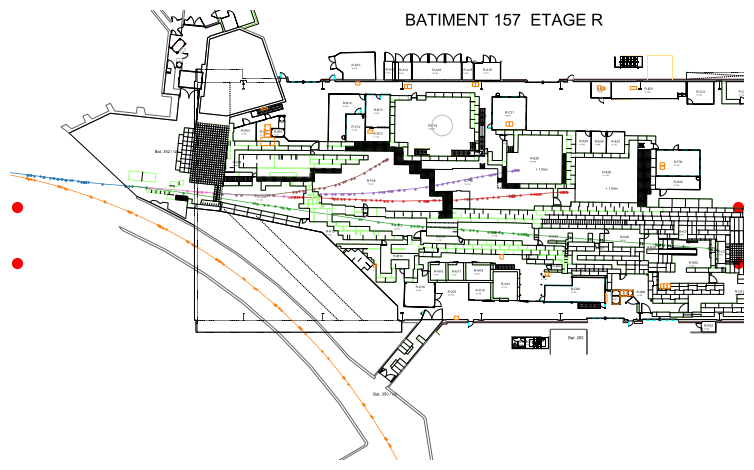

In [42]:
fig, ax = plt.subplots(figsize=(50,10), tight_layout=True)
doc, auditor = recover.readfile('157_R.dxf')
ctx = RenderContext(doc)
out = MatplotlibBackend(ax)

from ezdxf.addons.drawing.config import Configuration, BackgroundPolicy
config = Configuration().with_changes(background_policy=BackgroundPolicy.CUSTOM, custom_bg_color="#ffffff00", lineweight_scaling=1)

frontend = Frontend(ctx, out, config=config)
frontend.draw_layout(doc.modelspace(), finalize=True)

x_change_ref = 75490
y_change_ref = 9309.75

for df in [df_f61, df_pr, df_t08, df_t09, df_t10, df_t11, df_f62, df_f63]:
    ax.plot(x_change_ref + df.x, y_change_ref + df.y, marker="+",zorder=99, markersize=2, linewidth=0.5)

ax.set_aspect("equal")

ax.autoscale(enable=False)

xmin = 77510
xmax = 77640
ymin = 11490
ymax = 11500
ax.scatter(xmin, ymin, c="r", s=50)
ax.scatter(xmin, ymax, c="r", s=50)
ax.scatter(xmax, ymin, c="r", s=50)
ax.scatter(xmax, ymax, c="r", s=50)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

fig.savefig('East_Area_combined.png', dpi=600)

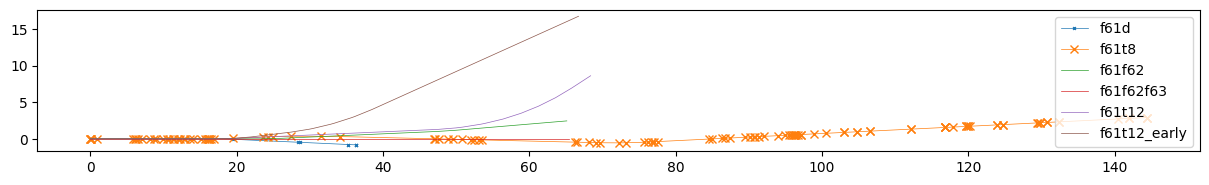

In [43]:
fig, ax = plt.subplots(figsize=(15,8))
lw = 0.5
ax.plot(survey_f61d.z, survey_f61d.x, markersize=2, marker="x", linewidth=lw, label="f61d")
ax.plot(survey_f61t8.z, survey_f61t8.x, label="f61t8", marker="x", lw=lw)
ax.plot(survey_f61f62.z, survey_f61f62.x, label="f61f62", lw=lw)
ax.plot(survey_f61f62f63.z, survey_f61f62f63.x, label="f61f62f63", lw=lw)
ax.plot(survey_f61t12.z, survey_f61t12.x, label="f61t12", lw=lw)
ax.plot(survey_f61t12_early.z, survey_f61t12_early.x, label="f61t12_early", lw=lw)

ax.set_aspect("equal")
ax.legend(loc="upper right")

(2190.0, 2200.0)

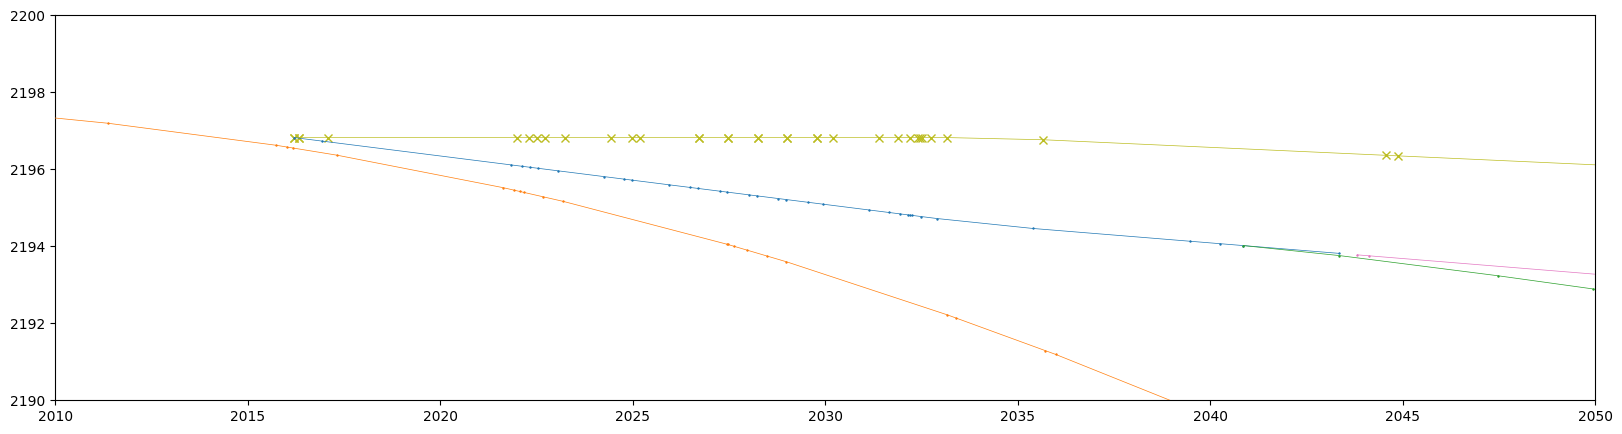

In [44]:
fig, ax = plt.subplots(figsize=(25,5))
for df in [df_f61, df_pr, df_t08, df_t09, df_t10, df_t11, df_f62, df_f63]:
    ax.plot(df.x, df.y, marker="+",zorder=99, markersize=2, linewidth=0.5)

ax.plot(survey_f61d.z + df_f61.x[0], survey_f61d.x + df_f61.y[0], label="f61t8", marker="x", lw=lw)

ax.set_aspect("equal")
ax.set_xlim(2010, 2050)
ax.set_ylim(2190, 2200)

In [45]:
survey_f61d.name

array(['f61d$start:1', 'f61.start:1', 'drift_0:0', 'm2:1',
       'f61.mqncl007:1', 'drift_1:0', 'f61.btv012:1', 'drift_2:0',
       'f61.mcxce013:1', 'drift_3:0', 'f61.mqnel014:1', 'drift_4:0',
       'f61.mcxce015:1', 'drift_5:0', 'f61.tbs016:1', 'drift_6:0',
       'f61.tbs017:1', 'drift_7:0', 'f61.tbs018:1', 'drift_8:0',
       'f61.tbs019:1', 'drift_9:0', 'f61.tbs020:1', 'drift_10:0',
       'f61.mqnef021:1', 'drift_11:0', 'f61.bctf022:1', 'drift_12:0',
       'f61.bcgaa023:1', 'drift_13:0', 'f61.xsec023:1', 'drift_14:0',
       'f61.mbxhd025:1', 'drift_15:0', 'f61.btv010:1', 'drift_16:0',
       'f61.tde018:1', 'drift_17:0', 'f61.end:1', 'f61d$end:1'],
      dtype='<U14')

In [46]:
survey_f61d.z

array([ 0.        ,  0.        ,  0.13287   ,  0.13287   ,  0.87287   ,
        5.79992   ,  6.10592   ,  6.30592   ,  6.50592   ,  7.04092   ,
        8.24092   ,  8.77592   ,  8.97592   , 10.50822   , 10.50822   ,
       11.27532   , 11.27532   , 12.04242   , 12.04242   , 12.80952   ,
       12.80952   , 13.57662   , 13.57662   , 13.98992   , 15.18992   ,
       15.69392   , 15.99292   , 16.20492   , 16.26492   , 16.30492   ,
       16.54492   , 16.96490525, 19.46426107, 28.35508909, 28.66077373,
       35.28394112, 35.28394112, 36.28291323, 36.28291323, 36.28291323])

In [47]:
survey_f61d.x

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.05674944, -0.46070135, -0.47459004,
       -0.77551152, -0.77551152, -0.82089949, -0.82089949, -0.82089949])

In [48]:
df_t08.head(5)

name            x            y  x_dev_absolute  y_dev_absolute
0  F61.MBXHD033.E  2040.866515  2194.017941     2053.246485     2187.598571
1  F61.MBXHD033.S  2043.353051  2193.758866     2055.674911     2187.004653
2  T08.MBXHD005.E  2047.470901  2193.235268     2059.683869     2185.931724
3  T08.MBXHD005.S  2049.947209  2192.891925     2062.090644     2185.255398
4    T08.BTV020.E  2062.692268  2190.977778     2074.459710     2181.627607

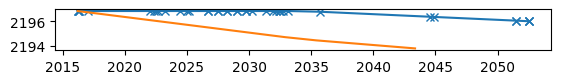

In [49]:
# Rotate the survey

d = {'x': survey_f61d.z, 'y': survey_f61d.x,}
df_survey_f61d = pd.DataFrame(data=d)

fig, ax = plt.subplots()

# ax.plot(df_survey_f61d.x, df_survey_f61d.y)

# Rotation parameters
angle_degrees = 0
center_of_rotation = (0, 0)  # Example center (cx, cy)

for df in [df_survey_f61d]:
    # Apply rotation to specific row
    for i in df.index:
        x_rotated, y_rotated = rotate_around_point(df.loc[i, 'x'], df.loc[i, 'y'], *center_of_rotation, angle_degrees)
        df.loc[i, 'x'] = x_rotated
        df.loc[i, 'y'] = y_rotated
    ax.plot(df.x + df_f61.x[0], df.y + df_f61.y[0], marker="x")

ax.plot(df_f61.x, df_f61.y)

ax.set_aspect("equal")

/var/folders/8q/l42hhsl13fxd0py0_2dw6k900000gn/T/ipykernel_6493/2469973304.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  output_dataframe = pd.concat([output_dataframe, new_rows], ignore_index=True)
/var/folders/8q/l42hhsl13fxd0py0_2dw6k900000gn/T/ipykernel_6493/2469973304.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  output_dataframe = pd.concat([output_dataframe, new_rows], ignore_index=True)
/var/folders/8q/l42hhsl13fxd0py0_2dw6k900000gn/T/ipykernel_6493/2469973304.py:14: Runtim

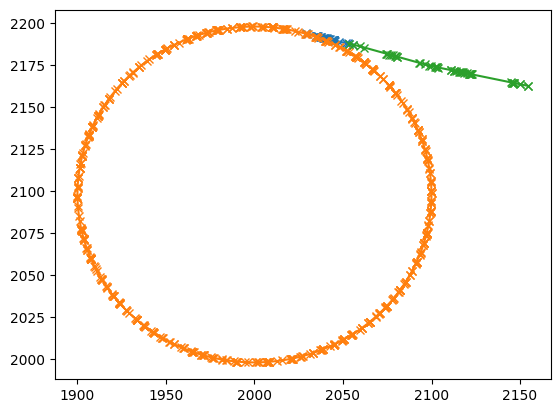

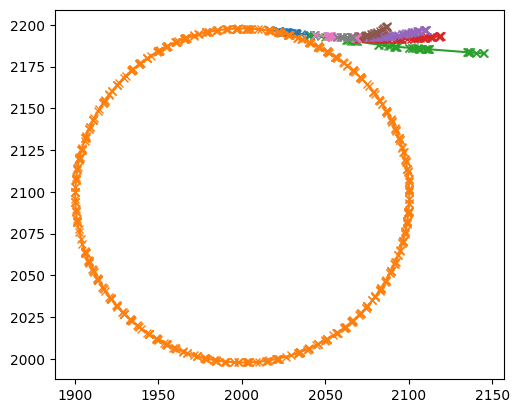

In [50]:
dev_f61 = pd.read_csv('geode_data/beam_dev_18_11_2021_F61.csv', skiprows=1)
dev_pr = pd.read_csv('geode_data/beam_dev_18_11_2021_PR.csv', skiprows=1)
dev_t08 = pd.read_csv('geode_data/beam_dev_18_11_2021_T08.csv', skiprows=1)
dev_t09 = pd.read_csv('geode_data/beam_dev_18_11_2021_T09.csv', skiprows=1)
dev_t10 = pd.read_csv('geode_data/beam_dev_18_11_2021_T10.csv', skiprows=1)
dev_t11 = pd.read_csv('geode_data/beam_dev_18_11_2021_T11.csv', skiprows=1)
dev_f62 = pd.read_csv('geode_data/beam_dev_18_11_2021_F62.csv', skiprows=1)
dev_f63 = pd.read_csv('geode_data/beam_dev_18_11_2021_F63.csv', skiprows=1)

df_f61 = calc_absolute_deviation(dev_f61)
df_pr = calc_absolute_deviation(dev_pr)
df_t08 = calc_absolute_deviation(dev_t08)
df_t09 = calc_absolute_deviation(dev_t09)
df_t10 = calc_absolute_deviation(dev_t10)
df_t11 = calc_absolute_deviation(dev_t11)
df_f62 = calc_absolute_deviation(dev_f62)
df_f63 = calc_absolute_deviation(dev_f63)

fig, ax = plt.subplots()

ax.plot(df_f61.x, df_f61.y, marker="x", label = "F61 theoretical")
ax.plot(df_pr.x, df_pr.y, marker="x", label = "PR theoretical")
ax.plot(df_t08.x, df_t08.y, marker="x", label = "T08 theoretical")

fig, ax = plt.subplots()

# Function to rotate a point around another point
def rotate_around_point(x, y, cx, cy, angle_degrees):
    # Translate point to origin
    x -= cx
    y -= cy

    # Convert angle to radians
    angle_radians = np.radians(angle_degrees)

    # Perform rotation
    x_rotated = x * np.cos(angle_radians) - y * np.sin(angle_radians)
    y_rotated = x * np.sin(angle_radians) + y * np.cos(angle_radians)

    # Translate back
    x_rotated += cx
    y_rotated += cy

    return x_rotated, y_rotated

# Rotation parameters
angle_degrees = 7.8
center_of_rotation = (2000, 2100)  # Example center (cx, cy)

for df in [df_f61, df_pr, df_t08, df_t09, df_t10, df_t11, df_f62, df_f63]:
    # Apply rotation to specific row
    for i in df.index:
        x_rotated, y_rotated = rotate_around_point(df.loc[i, 'x'], df.loc[i, 'y'], *center_of_rotation, angle_degrees)
        df.loc[i, 'x'] = x_rotated
        df.loc[i, 'y'] = y_rotated
    ax.plot(df.x, df.y, marker="x")
ax.set_aspect("equal")

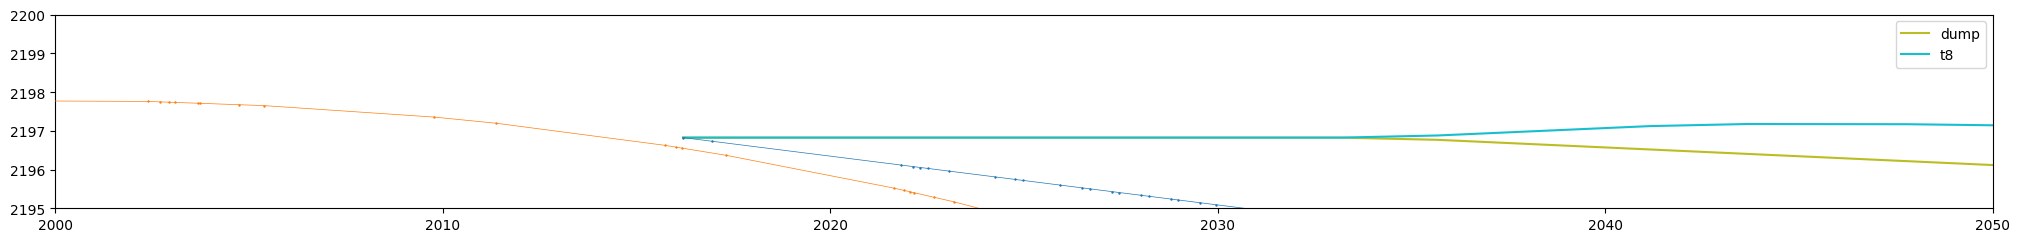

In [52]:
fig, ax = plt.subplots(figsize=(25,5))
for df in [df_f61, df_pr, df_t08, df_t09, df_t10, df_t11, df_f62, df_f63]:
    ax.plot(df.x, df.y, marker="+",zorder=99, markersize=2, linewidth=0.5)

d = {'x': survey_f61d.z, 'y': survey_f61d.x,}
df_survey_f61d = pd.DataFrame(data=d)

d = {'x': survey_f61t8.z, 'y': survey_f61t8.x,}
df_survey_f61t8 = pd.DataFrame(data=d)


ax.plot(df_survey_f61d.x + df_f61.x[0], df_survey_f61d.y + df_f61.y[0], label="dump")
ax.plot(df_survey_f61t8.x + df_f61.x[0], df_survey_f61t8.y + df_f61.y[0], label="t8")

ax.set_aspect("equal")
ax.set_xlim(2000, 2050)
ax.set_ylim(2195, 2200)
ax.legend()

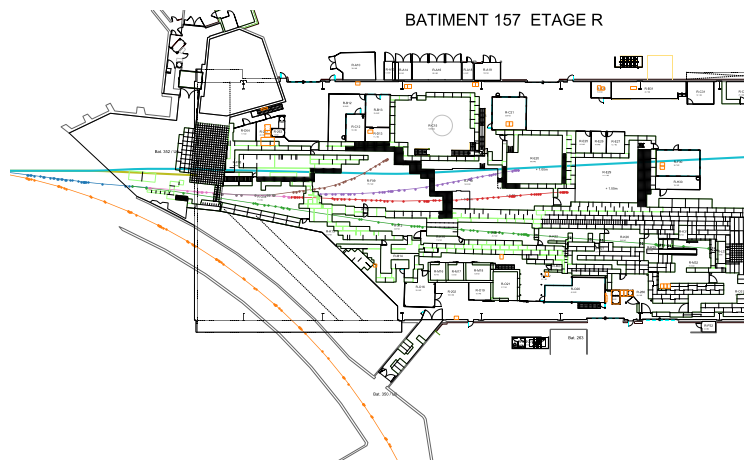

In [57]:
fig, ax = plt.subplots(figsize=(50,10), tight_layout=True)
doc, auditor = recover.readfile('157_R.dxf')
ctx = RenderContext(doc)
out = MatplotlibBackend(ax)

from ezdxf.addons.drawing.config import Configuration, BackgroundPolicy
config = Configuration().with_changes(background_policy=BackgroundPolicy.CUSTOM, custom_bg_color="#ffffff00", lineweight_scaling=1)

frontend = Frontend(ctx, out, config=config)
frontend.draw_layout(doc.modelspace(), finalize=True)

x_change_ref = 75490
y_change_ref = 9309.75

for df in [df_f61, df_pr, df_t08, df_t09, df_t10, df_t11, df_f62, df_f63]:
    ax.plot(x_change_ref + df.x, y_change_ref + df.y, marker="+",zorder=99, markersize=2, linewidth=0.5)

ax.plot(df_survey_f61d.x + df_f61.x[0] + x_change_ref, df_survey_f61d.y + df_f61.y[0] + y_change_ref, label="dump")
ax.plot(df_survey_f61t8.x + df_f61.x[0] + x_change_ref, df_survey_f61t8.y + df_f61.y[0] + y_change_ref, label="t8")

xmin = 77510
xmax = 77640
ymin = 11490
ymax = 11500

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.set_aspect("equal")
fig.savefig('East_Area_combined.png', dpi=600)

# I need to rotate the Survey line from MAD-X to match GEODE and the DXF file

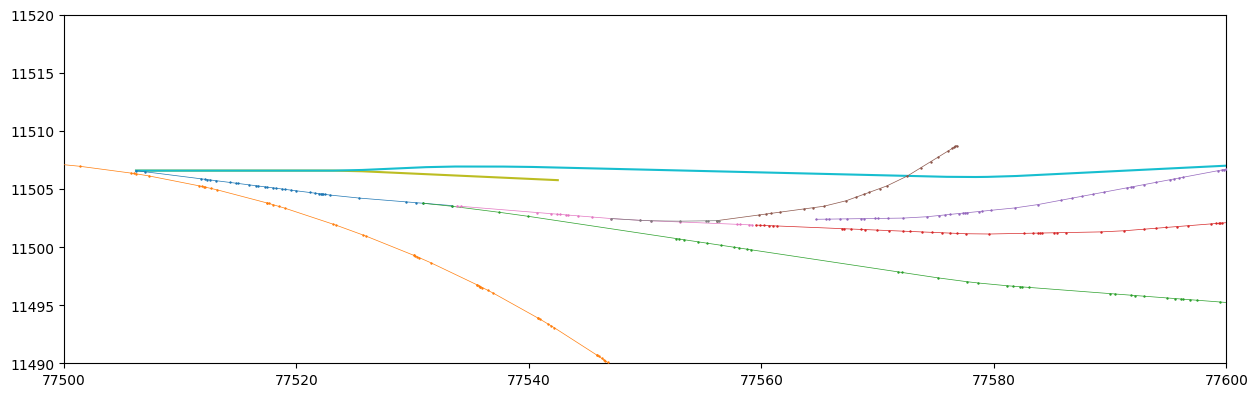

In [68]:
fig, ax = plt.subplots(figsize=(15,8))

for df in [df_f61, df_pr, df_t08, df_t09, df_t10, df_t11, df_f62, df_f63]:
    ax.plot(x_change_ref + df.x, y_change_ref + df.y, marker="+",zorder=99, markersize=2, linewidth=0.5)

ax.plot(df_survey_f61d.x + df_f61.x[0] + x_change_ref, df_survey_f61d.y + df_f61.y[0] + y_change_ref, label="dump")
ax.plot(df_survey_f61t8.x + df_f61.x[0] + x_change_ref, df_survey_f61t8.y + df_f61.y[0] + y_change_ref, label="t8")


xmin = 77500
xmax = 77600
ymin = 11490
ymax = 11520

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect("equal")

In [89]:
d = {'x': df_survey_f61d.x + df_f61.x[0] + x_change_ref, 'y': df_survey_f61d.y + df_f61.y[0] + y_change_ref}
df_survey_f61d_translated = pd.DataFrame(data=d)

d = {'x': df_survey_f61t8.x + df_f61.x[0] + x_change_ref, 'y': df_survey_f61t8.y + df_f61.y[0] + y_change_ref}
df_survey_f61t8_translated = pd.DataFrame(data=d)

In [98]:
# Rotation parameters
angle_degrees = -7.2
center_of_rotation = (df_survey_f61d_translated.x[0], df_survey_f61d_translated.y[0])

for df in [df_survey_f61d_translated, df_survey_f61t8_translated]:
    # Apply rotation to specific row
    for i in df.index:
        x_rotated, y_rotated = rotate_around_point(df.loc[i, 'x'], df.loc[i, 'y'], *center_of_rotation, angle_degrees)
        df.loc[i, 'x_rot'] = x_rotated
        df.loc[i, 'y_rot'] = y_rotated

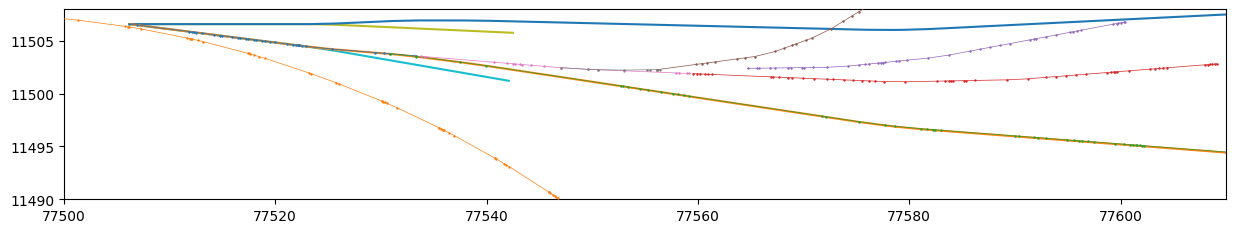

In [104]:
fig, ax = plt.subplots(figsize=(15,8))

for df in [df_f61, df_pr, df_t08, df_t09, df_t10, df_t11, df_f62, df_f63]:
    ax.plot(x_change_ref + df.x, y_change_ref + df.y, marker="+",zorder=99, markersize=2, linewidth=0.5)

for df in [df_survey_f61d_translated, df_survey_f61t8_translated]:
    ax.plot(df.x, df.y)
    ax.plot(df.x_rot, df.y_rot)

xmin = 77500
xmax = 77540
xmax = 77610

ymin = 11502
ymin = 11490
ymax = 11508

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect("equal")

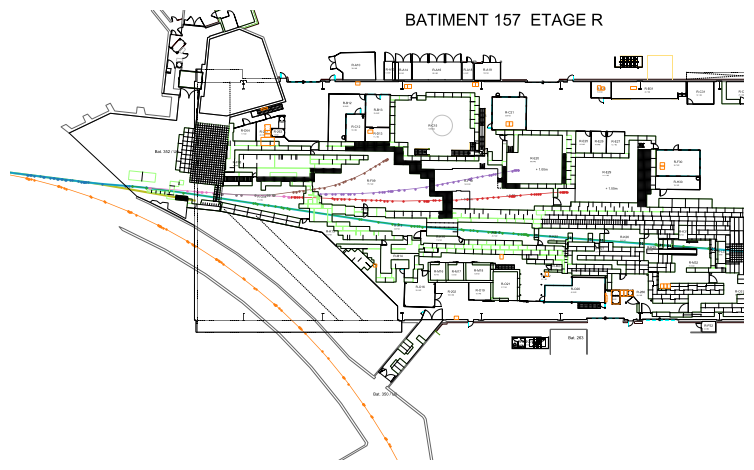

In [111]:
fig, ax = plt.subplots(figsize=(50,10), tight_layout=True)
doc, auditor = recover.readfile('157_R.dxf')
ctx = RenderContext(doc)
out = MatplotlibBackend(ax)

from ezdxf.addons.drawing.config import Configuration, BackgroundPolicy
config = Configuration().with_changes(background_policy=BackgroundPolicy.CUSTOM, custom_bg_color="#ffffff00", lineweight_scaling=1)

frontend = Frontend(ctx, out, config=config)
frontend.draw_layout(doc.modelspace(), finalize=True)

x_change_ref = 75490
y_change_ref = 9309.75

for df in [df_f61, df_pr, df_t08, df_t09, df_t10, df_t11, df_f62, df_f63]:
    ax.plot(x_change_ref + df.x, y_change_ref + df.y, marker="+",zorder=99, markersize=2, linewidth=0.5)

for df in [df_survey_f61d_translated, df_survey_f61t8_translated]:
    ax.plot(df.x_rot, df.y_rot)

xmin = 77510
xmax = 77640
ymin = 11490
ymax = 11500

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.set_aspect("equal")
fig.savefig('East_Area_combined_survey.png', dpi=600)